In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_excel('/content/Online Retail (1).xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [ ]:
df.dropna(inplace=True)

Recency


In [ ]:
current_date=df["InvoiceDate"].max()
recent_date=df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
print(recent_date.head())
recent_date['Recency']=(current_date-recent_date['InvoiceDate']).dt.days
print(recent_date[['CustomerID','Recency']].head(10))

   CustomerID         InvoiceDate
0     12346.0 2011-01-18 10:17:00
1     12347.0 2011-12-07 15:52:00
2     12348.0 2011-09-25 13:13:00
3     12349.0 2011-11-21 09:51:00
4     12350.0 2011-02-02 16:01:00
   CustomerID  Recency
0     12346.0      325
1     12347.0        1
2     12348.0       74
3     12349.0       18
4     12350.0      309
5     12352.0       35
6     12353.0      203
7     12354.0      231
8     12355.0      213
9     12356.0       22


Frequency

In [ ]:
frequency_date=df.groupby("CustomerID")["InvoiceDate"].nunique().reset_index()
frequency_date.columns=['CustomerID','Frequency']
print(frequency_date)

      CustomerID  Frequency
0        12346.0          2
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4367     18280.0          1
4368     18281.0          1
4369     18282.0          3
4370     18283.0         16
4371     18287.0          3

[4372 rows x 2 columns]


In [ ]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']#calculating monetry value

In [ ]:
monetary_date=df.groupby("CustomerID")["TotalPrice"].sum().reset_index()
monetary_date.columns=['CustomerID','Monetary']
print(monetary_date.head(10))

   CustomerID  Monetary
0     12346.0      0.00
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40
5     12352.0   1545.41
6     12353.0     89.00
7     12354.0   1079.40
8     12355.0    459.40
9     12356.0   2811.43


In [ ]:
df1=pd.merge(recent_date,frequency_date)
df1=pd.merge(df1,monetary_date,on='CustomerID')
df1

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60
4368,18281.0,2011-06-12 10:53:00,180,1,80.82
4369,18282.0,2011-12-02 11:43:00,7,3,176.60
4370,18283.0,2011-12-06 12:02:00,3,16,2045.53


In [ ]:
df1.drop(['InvoiceDate'],axis=1,inplace=True)

KeyError: "['InvoiceDate'] not found in axis"

In [ ]:
df1.shape

(4372, 5)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df1

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,2,0.00,0
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,0
...,...,...,...,...,...
4367,18280.0,277,1,180.60,0
4368,18281.0,180,1,80.82,0
4369,18282.0,7,3,176.60,0
4370,18283.0,3,16,2045.53,0


In [ ]:
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=15)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

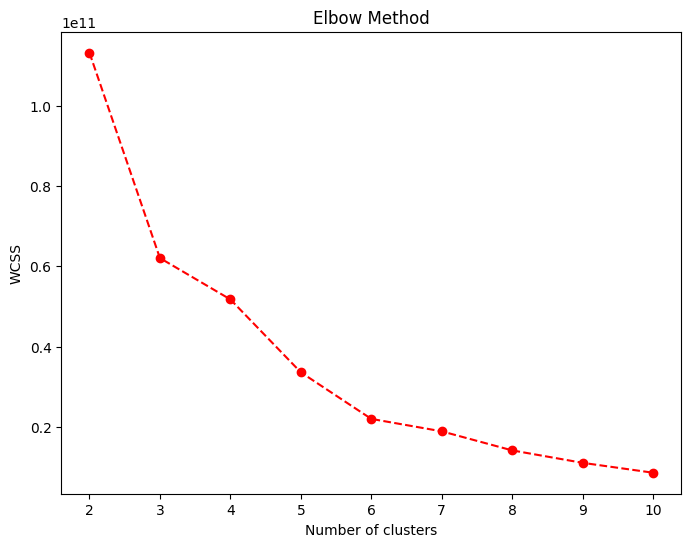

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(2,11),wcss,marker='o',linestyle='--',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df1['Cluster']=kmeans.labels_
df1

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,2,0.00,0
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,0
...,...,...,...,...,...
4367,18280.0,277,1,180.60,0
4368,18281.0,180,1,80.82,0
4369,18282.0,7,3,176.60,0
4370,18283.0,3,16,2045.53,0


In [ ]:
for i in range(4):
  cluster_df=df1[df1['Cluster']==i]
  print(f"Cluster{i}:\n{cluster_df}\n")

Cluster0:
      CustomerID  Recency  Frequency  Monetary  Cluster
0        12346.0      325          2      0.00        0
1        12347.0        1          7   4310.00        0
2        12348.0       74          4   1797.24        0
3        12349.0       18          1   1757.55        0
4        12350.0      309          1    334.40        0
...          ...      ...        ...       ...      ...
4367     18280.0      277          1    180.60        0
4368     18281.0      180          1     80.82        0
4369     18282.0        7          3    176.60        0
4370     18283.0        3         16   2045.53        0
4371     18287.0       42          3   1837.28        0

[4329 rows x 5 columns]

Cluster1:
      CustomerID  Recency  Frequency   Monetary  Cluster
1703     14646.0        1         77  279489.02        1
3758     17450.0        7         55  187322.17        1
4233     18102.0        0         57  256438.49        1

Cluster2:
      CustomerID  Recency  Frequency  Monet

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(x,kmeans.labels_)
print('average silhoutte score:',silhouette_avg)

average silhoutte score: 0.9063557768602256


Cluster
0    4329
2      36
3       4
1       3
Name: count, dtype: int64


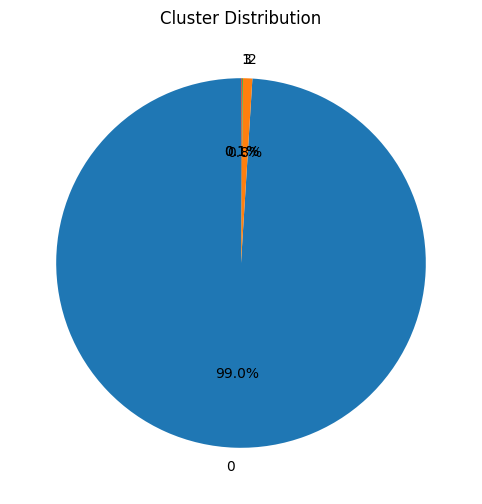

In [ ]:
cluster_count=df1['Cluster'].value_counts()
print(cluster_count)

plt.figure(figsize=(8,6))
plt.pie(cluster_count,labels=cluster_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Cluster Distribution')
plt.show()

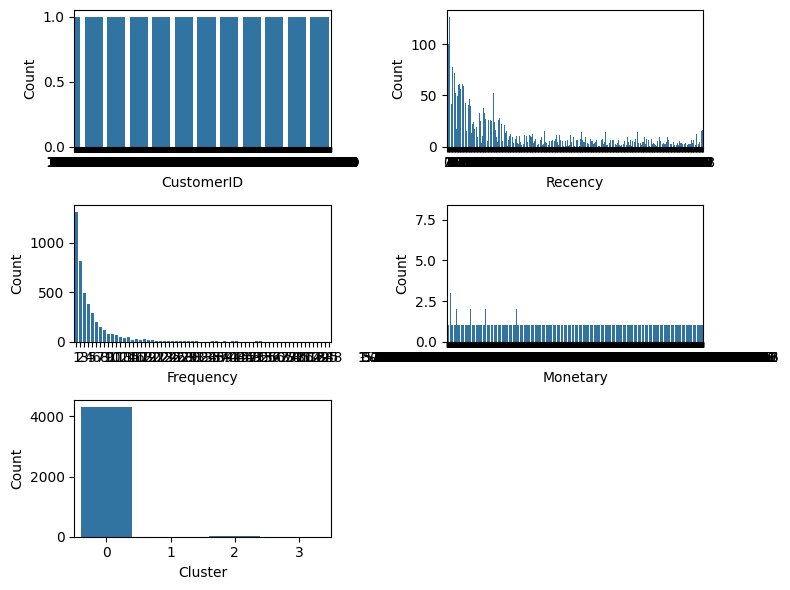

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
for i,col in enumerate(df1,1):
  plt.subplot(3,2,i)
  sns.countplot(data=df1,x=col)
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.tight_layout()
plt.show()

In [ ]:
df1['r_rank']=df1['Recency'].rank(ascending=False)#gives higher rank to the customers with lower recency
df1['f_rank']=df1['Frequency'].rank(ascending=True)#here lower the frequeny lower the rank
df1['m_rank']=df1['Monetary'].rank(ascending=True)
df1

,CustomerID,Recency,Frequency,Monetary,Cluster,r_rank,f_rank,m_rank
0,12346.0,325,2,0.00,0,167.0,1723.5,46.5
1,12347.0,1,7,4310.00,0,4221.5,3566.0,4054.0
2,12348.0,74,4,1797.24,0,1649.5,2811.5,3398.0
3,12349.0,18,1,1757.55,0,3152.5,657.5,3372.0
4,12350.0,309,1,334.40,0,241.0,657.5,1309.0
...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,0,362.0,657.5,635.0
4368,18281.0,180,1,80.82,0,863.5,657.5,159.0
4369,18282.0,7,3,176.60,0,3785.5,2377.5,606.5
4370,18283.0,3,16,2045.53,0,4012.0,4147.5,3522.0


In [ ]:
#normalizing the data
df1['r_rank_norm']=(df1['r_rank']/df1['r_rank'].max())*100
df1['f_rank_norm']=(df1['f_rank']/df1['f_rank'].max())*100
df1['m_rank_norm']=(df1['m_rank']/df1['m_rank'].max())*100
df1

,CustomerID,Recency,Frequency,Monetary,Cluster,r_rank,f_rank,m_rank,r_rank_norm,f_rank_norm,m_rank_norm
0,12346.0,325,2,0.00,0,167.0,1723.5,46.5,3.865741,39.421317,1.063586
1,12347.0,1,7,4310.00,0,4221.5,3566.0,4054.0,97.719907,81.564501,92.726441
2,12348.0,74,4,1797.24,0,1649.5,2811.5,3398.0,38.182870,64.306953,77.721866
3,12349.0,18,1,1757.55,0,3152.5,657.5,3372.0,72.974537,15.038884,77.127173
4,12350.0,309,1,334.40,0,241.0,657.5,1309.0,5.578704,15.038884,29.940531
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,0,362.0,657.5,635.0,8.379630,15.038884,14.524245
4368,18281.0,180,1,80.82,0,863.5,657.5,159.0,19.988426,15.038884,3.636780
4369,18282.0,7,3,176.60,0,3785.5,2377.5,606.5,87.627315,54.380146,13.872370
4370,18283.0,3,16,2045.53,0,4012.0,4147.5,3522.0,92.870370,94.865050,80.558097


In [ ]:
df1.drop(["r_rank","f_rank","m_rank"],axis=1)

,CustomerID,Recency,Frequency,Monetary,Cluster,r_rank_norm,f_rank_norm,m_rank_norm
0,12346.0,325,2,0.00,0,3.865741,39.421317,1.063586
1,12347.0,1,7,4310.00,0,97.719907,81.564501,92.726441
2,12348.0,74,4,1797.24,0,38.182870,64.306953,77.721866
3,12349.0,18,1,1757.55,0,72.974537,15.038884,77.127173
4,12350.0,309,1,334.40,0,5.578704,15.038884,29.940531
...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,0,8.379630,15.038884,14.524245
4368,18281.0,180,1,80.82,0,19.988426,15.038884,3.636780
4369,18282.0,7,3,176.60,0,87.627315,54.380146,13.872370
4370,18283.0,3,16,2045.53,0,92.870370,94.865050,80.558097
